# Univariate Time Series Manipulation & Visualization

In [25]:
import pandas as pd

path = 'energy_generation_hourly_year.csv'

df = pd.read_csv(path,
                index_col=0, 
                parse_dates=True,
                )

df

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.00,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.600,516.600,1.000,287.7
2022-09-01 01:00:00,750.00,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.700,514.400,1.000,247.7
2022-09-01 02:00:00,777.50,1153.9,13644.750,3547.500,798.100,272.6,6873.9,78.000,512.700,1.200,239.7
2022-09-01 03:00:00,802.50,1146.0,13736.500,3188.650,795.500,273.0,6879.9,78.000,512.500,0.200,209.7
2022-09-01 04:00:00,816.25,1152.8,13706.825,2594.225,821.600,271.7,6873.9,78.100,513.100,0.400,231.5
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 19:00:00,472.50,2084.9,9390.275,2780.800,2335.900,228.4,6853.0,1611.600,493.575,5212.173,1691.6
2023-08-31 20:00:00,455.00,2141.1,10097.725,3072.800,3860.400,230.9,6857.0,1910.850,500.600,861.975,1039.1
2023-08-31 21:00:00,509.10,2149.1,11359.425,3057.150,3852.325,236.9,6864.0,1343.375,505.100,21.400,668.8


In [26]:
s_solar = df['Solar Photovoltaic']
s_solar

time
2022-09-01 00:00:00       1.000
2022-09-01 01:00:00       1.000
2022-09-01 02:00:00       1.200
2022-09-01 03:00:00       0.200
2022-09-01 04:00:00       0.400
                         ...   
2023-08-31 19:00:00    5212.173
2023-08-31 20:00:00     861.975
2023-08-31 21:00:00      21.400
2023-08-31 22:00:00      17.600
2023-08-31 23:00:00      17.400
Name: Solar Photovoltaic, Length: 8759, dtype: float64

<Axes: xlabel='time'>

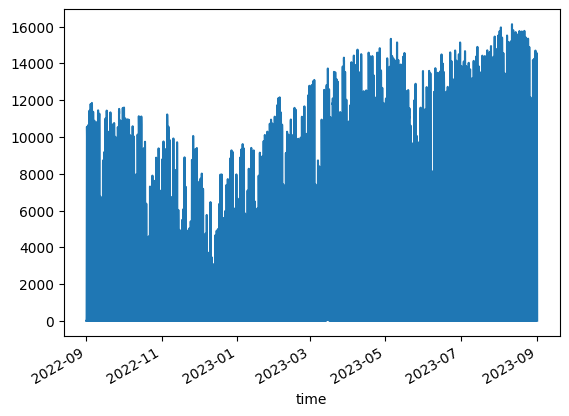

In [27]:
s_solar.plot()

## Resampling the Time
- [Date offset `rule` list](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
- [Pandas plot `kind` list](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Daily

<Axes: xlabel='time'>

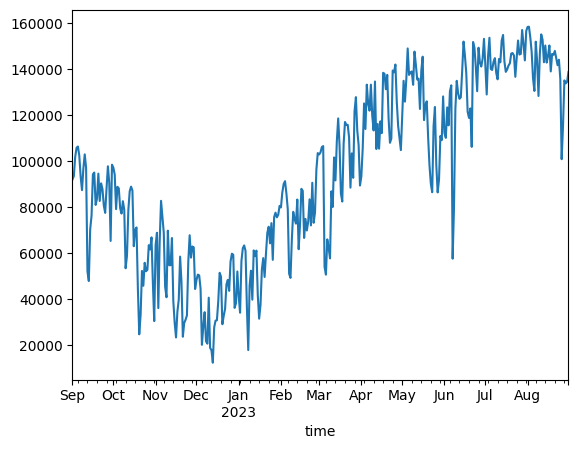

In [28]:
s_solar.resample(rule='D').sum().plot()

### Monthly

C:\Users\danie\AppData\Local\Temp\ipykernel_14152\3693444446.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s_solar.resample(rule='M').sum().plot()


<Axes: xlabel='time'>

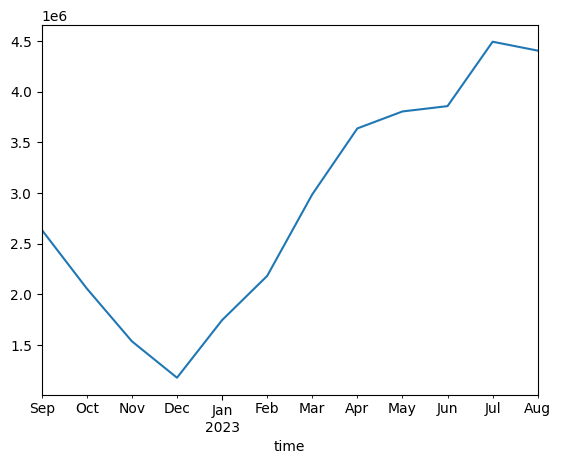

In [29]:
s_solar.resample(rule='M').sum().plot()

C:\Users\danie\AppData\Local\Temp\ipykernel_14152\3198584979.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s_solar.resample(rule='M').sum().plot(kind='area')


<Axes: xlabel='time'>

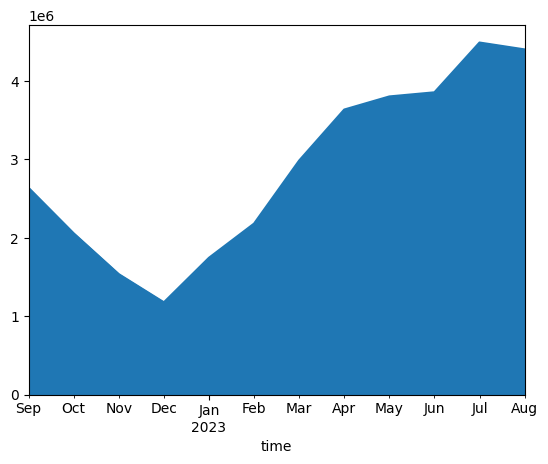

In [30]:
s_solar.resample(rule='M').sum().plot(kind='area')

C:\Users\danie\AppData\Local\Temp\ipykernel_14152\1467952099.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s_solar.resample(rule='M').sum().plot(kind='bar');


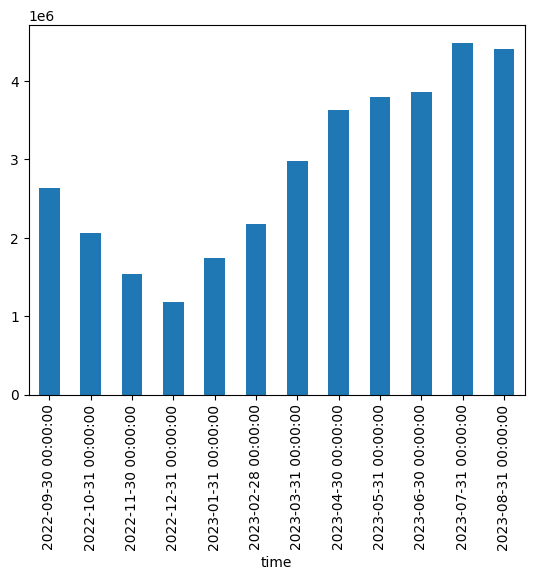

In [31]:
s_solar.resample(rule='M').sum().plot(kind='bar');

## Pivot Tables

### Transform object to DataFrame

> Only if you don't have a DataFrame yet.

In [32]:
df_solar = s_solar.to_frame()
df_solar

,Solar Photovoltaic
time,
2022-09-01 00:00:00,1.000
2022-09-01 01:00:00,1.000
2022-09-01 02:00:00,1.200
2022-09-01 03:00:00,0.200
2022-09-01 04:00:00,0.400
...,...
2023-08-31 19:00:00,5212.173
2023-08-31 20:00:00,861.975
2023-08-31 21:00:00,21.400


### Create columns with datetime information

In [33]:
df_solar = (df_solar
 .assign(
     year=lambda df: df.index.year,
     month=lambda df: df.index.month,
     day=lambda df: df.index.day,
     hour=lambda df: df.index.hour))

df_solar

,Solar Photovoltaic,year,month,day,hour
time,,,,,
2022-09-01 00:00:00,1.000,2022,9,1,0
2022-09-01 01:00:00,1.000,2022,9,1,1
2022-09-01 02:00:00,1.200,2022,9,1,2
2022-09-01 03:00:00,0.200,2022,9,1,3
2022-09-01 04:00:00,0.400,2022,9,1,4
...,...,...,...,...,...
2023-08-31 19:00:00,5212.173,2023,8,31,19
2023-08-31 20:00:00,861.975,2023,8,31,20
2023-08-31 21:00:00,21.400,2023,8,31,21


### Process `pivot_table`

- Use this methodology.

In [34]:
dff = df_solar.pivot_table(
                            values='Solar Photovoltaic',
                            index='hour',
                            columns=['year', 'month'],
                            aggfunc='sum')
dff

year         2022                                            2023              \
month          9           10          11          12          1           2    
hour                                                                            
0          28.100     156.300      32.500      40.000      41.400     134.600   
1          28.000      62.000      41.300      43.700      59.800      79.000   
2          29.300     196.700      41.100      33.100      27.400      81.200   
3          73.400     123.000      30.900      32.700      36.800      69.100   
4          37.100      57.900      51.200      11.700      11.900      23.000   
5          38.100      72.200      37.800      10.400      12.300      28.200   
6          80.100      72.400      33.600      14.800      18.600      57.200   
7        1484.800     634.850     914.400      67.100      92.600     454.400   
8       32481.983   12201.650   29512.625    7188.775    8317.808   25599.525   
9      133006.033   80663.425  108742.100   55943.925   76764.379  127104.875   
10     228524.972  178497.575  179476.225  124995.800  176530.671  229011.375   
11     276370.175  236409.737  213545.775  165823.625  232871.943  272709.663   
12     300545.287  262853.640  226521.110  184566.856  255084.761  287504.750   
13     308811.025  269985.157  225823.850  187729.300  259550.042  290485.075   
14     307801.507  267775.710  214278.422  178748.100  254818.277  287463.125   
15     297342.840  253521.974  183110.929  151726.850  232777.335  271175.800   
16     275285.513  224351.022  115908.884   91933.450  170727.469  227046.855   
17     237646.100  168813.930   33920.845   24154.375   68090.190  129619.306   
18     165179.768   81916.125    2073.225    1464.475    7125.975   28470.223   
19      63515.302   15565.575     620.200    1122.100     897.600    1516.450   
20       6809.175    1474.500     889.200     565.500     502.100    1345.600   
21        711.100     858.100     261.500     437.100     284.700     829.300   
22        235.300     273.600      71.000     148.300     145.100     217.500   
23        154.200     221.200      56.800      69.000     167.300     139.000   

year                                                                           
month          3           4           5           6           7           8   
hour                                                                           
0         381.200      63.600      41.900      58.700     116.200     222.200  
1         434.200      93.600      67.700      67.400      30.100      74.300  
2         434.100      47.500      52.300     101.700      57.900      90.100  
3         332.400      56.200      53.700     115.400      48.000      86.600  
4         249.000      23.600      42.800      58.100      70.000     149.600  
5         253.100      24.300      32.400      70.600      35.000      47.600  
6         407.700      78.800     404.675     986.500     294.950     135.300  
7        7988.875    3880.210   23374.740   33444.025   26919.650    7491.200  
8       80356.150   70737.128  130802.067  145498.824  149265.200   98812.121  
9      212410.692  224648.615  263410.715  264086.263  297983.269  266932.667  
10     298004.834  324312.293  331387.929  324478.983  373564.273  374703.040  
11     336379.111  367533.570  368335.813  359785.737  407670.911  424718.359  
12     352545.149  387048.775  385041.537  374013.161  426310.697  448475.258  
13     354316.132  390794.131  389771.717  381798.513  435974.608  458953.260  
14     347454.001  387030.286  384314.900  379129.030  436975.684  459022.516  
15     328388.493  371885.726  369895.256  365476.928  426801.851  449509.341  
16     295977.905  350637.680  347728.868  345806.619  410902.747  429471.217  
17     223640.437  320791.285  315188.839  318289.188  385233.335  395238.489  
18     109558.195  262736.522  262537.452  272309.776  341807.989  328619.675  
19      28904.081  145139.395  170995.073  194415.58

### Style DataFrame

In [35]:
dff = (dff
        .div(1_000)
        .style
            .background_gradient(cmap='Oranges', axis=None)
            .format(precision=2))
dff